In [39]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
x_train = np.random.random((1000,1))
y_train = x_train*2 + np.random.random((1000,1))/3
x_test = np.random.random((100,1))
y_test = x_test*2 + np.random.random((100,1))/3

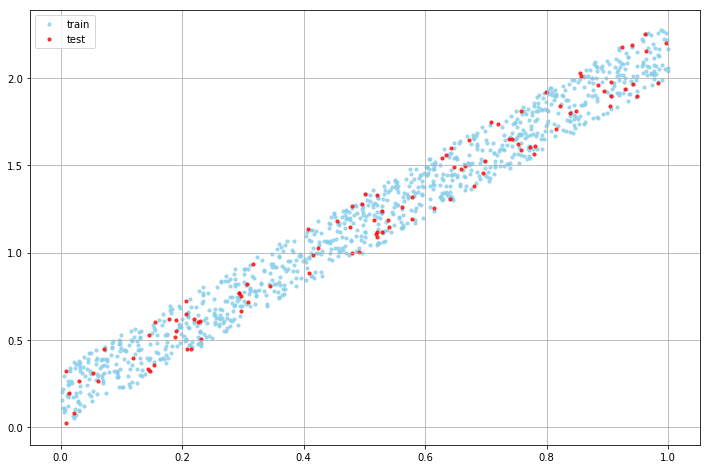

In [36]:
plt.figure(figsize=(12,8))

plt.scatter(x_train,y_train, alpha=0.75, c='skyblue', s=10, label='train')
plt.scatter(x_test,y_test, alpha=0.75, c='red', s=10, label='test')

plt.legend(loc='best')
plt.grid(True)
plt.show()

#### Keras

In [40]:
from keras.models import Sequential
from keras.layers import Dense

##### 1. 모델 구성하기

In [164]:
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


##### 2. 모델 학습시키기

In [165]:
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
1000/1000 [==============================] - 0s 232us/step - loss: 0.8825
Epoch 2/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.2289
Epoch 3/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.0485
Epoch 4/50
1000/1000 [==============================] - 0s 23us/step - loss: 0.0271
Epoch 5/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.0182
Epoch 6/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.0115
Epoch 7/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.0099
Epoch 8/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.0095
Epoch 9/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.0094
Epoch 10/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.0095
Epoch 11/50
1000/1000 [==============================] - 0s 27us/step - loss: 0.0094
Epoch 12/50
1000/1000 [==============================] - 0s 21us/step - l

##### 3. 학습과정 보기

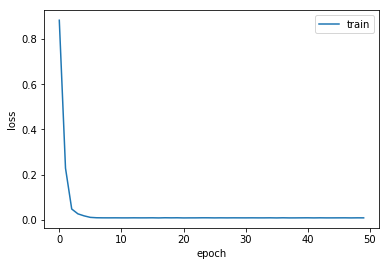

In [166]:
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'], loc='best')
plt.show()

##### 4. 평가하기

In [168]:
loss = model.evaluate(x_test,y_test, batch_size=32)

100/100 [==============================] - 0s 780us/step


In [169]:
print('loss : {:.2f}'.format(loss))

loss : 0.01


##### 5. 결과

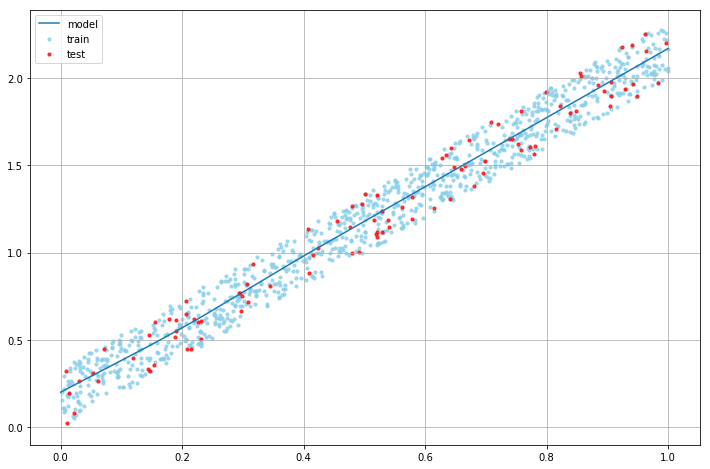

In [170]:
plt.figure(figsize=(12,8))

x = np.linspace(0,1)
y = model.predict(x)

plt.scatter(x_train,y_train, alpha=0.75, c='skyblue', s=10, label='train')
plt.scatter(x_test,y_test, alpha=0.75, c='red', s=10, label='test')
plt.plot(x,y, label='model')

plt.legend(loc='best')
plt.grid(True)
plt.show()